In [79]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pickle
import os
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
from llm import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1, 100))
gnbg_tasks.append(GNBGTask(2, 100))
gnbg_tasks.append(GNBGTask(3, 100))
gnbg_tasks.append(GNBGTask(4, 100))
gnbg_tasks.append(GNBGTask(5, 100))
gnbg_tasks.append(GNBGTask(6, 100))

In [60]:

API_KEY = os.getenv("DEEPSEEK_API_KEY")
print(API_KEY)


sk-505a4ff57cfb432d8888a3d8d66a3133


In [61]:
num_indis_per_task = 100
indi_len = 30
bound = 100
crossover = BLXCrossover()
mutation = PolynomialMutation(20)
rmp = NormalRMP(0.3)

amfea = AMFEA(num_indis_per_task, indi_len, gnbg_tasks, crossover, mutation, rmp)

bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
Initialization:
Task 0:
Best Fitness: 88493.00585449072
Mean Fitness: 174977.16220808227

Task 1:
Best Fitness: -701.3655706540103
Mean Fitness: -701.3096319430498

Task 2:
Best Fitness: 48286584358.337006
Mean Fitness: 90795706026.31805

Task 3:
Best Fitness: 350194.91288626625
Mean Fitness: 872582.2457233216

Task 4:
Best Fitness: -334.1102222074043
Mean Fitness: -334.0020092371859

Task 5:
Best Fitness: -183.45614275540558
Mean Fitness: -183.3469141626973



In [62]:
bfs, mfs = amfea.fit(1, monitor=True, monitor_rate=500)

bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
Gen 0
Task 0, Best: 88493.00585449072, Avg: 167077.12770866242
Task 1, Best: -701.3655706540103, Avg: -701.311541288806
Task 2, Best: 48286584358.337006, Avg: 84202532352.73575
Task 3, Best: 350194.91288626625, Avg: 811131.3754706655
Task 4, Best: -334.12939453125, Avg: -334.01151490934933
Task 5, Best: -183.45614275540558, Avg: -183.35809742606085
Time taken each gen: 0.0102 seconds

bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode
bound decode


In [34]:
for task in gnbg_tasks:
    print(task.gnbg.OptimumValue)

-1081.9837994003399
-703.1328146165181
-357.5797495903721
-382.6205211774271
-337.50899809752036
-186.86405320391498


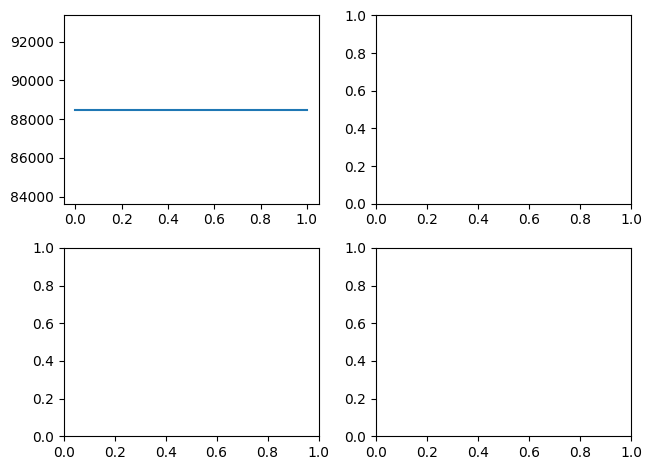

In [115]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout()
axes[0, 0].plot(bfs[0])

In [140]:
dim = 50
ackley_shift = np.full(dim, 40)
ackley = Ackley(dim, ackley_shift)

In [139]:
x_test = np.random.uniform(0, 1, size=dim)
AckleyTask = CEC17Task(ackley, 50)
AckleyTask.fitness(np.array([x_test]))

array([21.62846046])

In [146]:
print(x_test)

[1.54497289e-02 3.73075392e-01 6.80685665e-01 3.78825268e-02
 3.52137090e-01 5.02627644e-01 6.18971883e-01 1.93910040e-01
 8.19384054e-01 3.59008022e-01 8.07712359e-01 1.73845546e-01
 7.73339514e-02 2.36174594e-01 6.14256290e-01 3.02375235e-01
 3.78409693e-01 6.20038934e-01 7.38054693e-01 9.36308634e-01
 6.32990723e-01 5.75990794e-01 9.91329985e-01 4.78529562e-01
 4.18237589e-01 4.50769260e-01 5.42197142e-01 5.05828582e-01
 4.68777743e-01 9.61737813e-01 3.82030774e-01 4.84184529e-01
 3.19512602e-01 8.78023935e-01 2.90853054e-01 2.89497928e-01
 2.92489602e-01 7.02920959e-01 9.90768475e-04 3.58608156e-01
 4.74580837e-01 4.65569303e-01 8.84476476e-01 6.78671635e-01
 2.36138344e-01 1.31261740e-02 6.79019295e-02 1.08758098e-01
 4.67137280e-02 7.61178660e-01]


In [147]:
super_tasks = get_10_tasks()
for task in super_tasks:
    print(task.fitness(np.array([x_test])))

[149977.00668908]
[546768.72964811]
[393185.28373006]
[54.60241853]
[5.95251685e+09]
[21.62846046]
[103.05359919]
[21420.83233739]
[128.64771245]
[107798.04777011]


In [145]:
with open('x_test.pkl', 'wb') as f:
    pickle.dump(x_test, f)
f.close()

In [109]:
t = np.arange(10)

In [110]:
t = np.array([t, t])
t

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [111]:
t[:, :3]

array([[0, 1, 2],
       [0, 1, 2]])